# 09 - 서브플롯
matplotlib를 이용하여 하나의 그래픽 영역을 나누어 두개 이상의 시각화 결과물을 하나의 화면에서 표현 할 수 있다.


## #01. 필요한 패키지 및 샘플 데이터 준비

### 1) 패키지 참조

In [3]:
import numpy
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot

### 2) 데이터 가져오기
> 데이터 출처 : [KOSIS 국가통계포털](http://kosis.kr/index/index.do)

In [6]:
교통사고csv = read_csv("http://itpaper.co.kr/demo/py/traffic.csv", encoding="euc-kr")
교통사고csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [7]:
### 3) 데이터 전처리(년도별 합계 구하기)

In [9]:
교통사고tmp = 교통사고csv.filter(['년도','발생건수','사망자수', '부상자수'])
교통사고df = 교통사고tmp.groupby(['년도']).sum()
교통사고df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


## 3) 그래프에 대한 전역 환경 설정
pyplot 객체의 한글 폰트, 글자크기, 그래픽 사이즈를 설정한다. 이 코드가 다시 실행되기 전까지 모든 그래프 출력에 대해 적용된다.

In [12]:
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,10)

# 02. 서프플롯 영역 나누기
### 1) 2행 3열을 갖는 서브 플롯 영역 생성하기

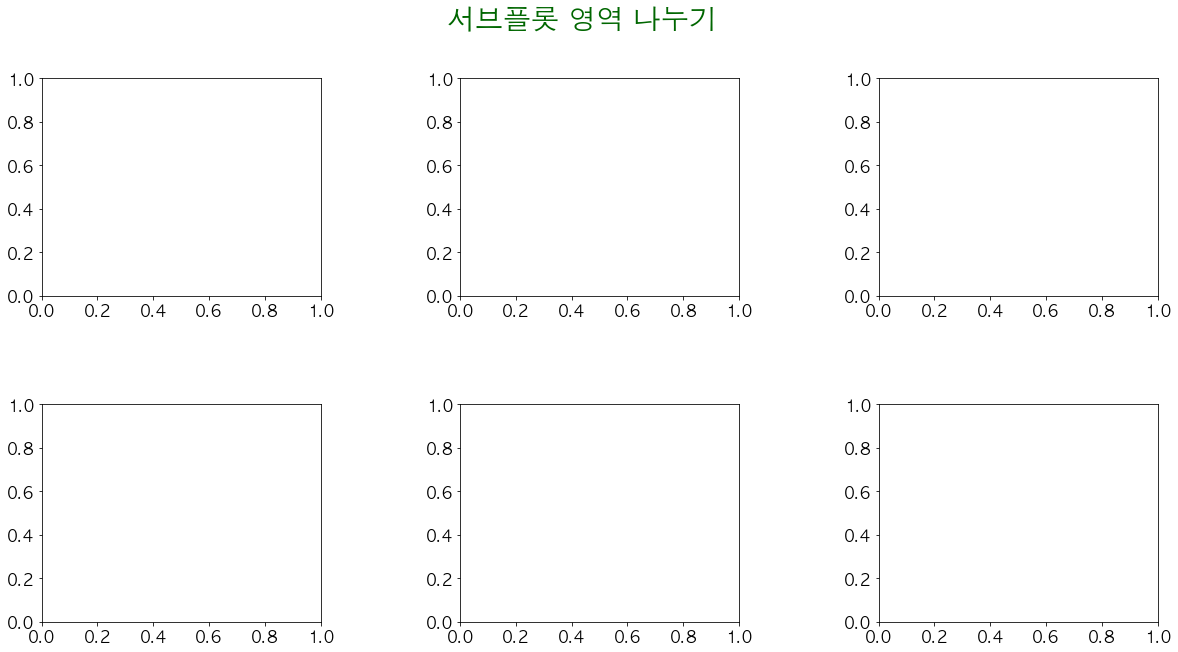

In [13]:
#영역을 나눌 수 있는객체 생성
fig = pyplot.figure()

#전체 제목
fig.suptitle('서브플롯 영역 나누기', fontsize=28, color='#006600')

#각 그래프 간의 가로w 세로h 간격 지정
fig.subplots_adjust(wspace=0.5, hspace=0.5)

ax1= fig.add_subplot(2, 3, 1) # 2행 3열의 영역중에서 첫 번째영역
ax2= fig.add_subplot(2, 3, 2) # 2행 3열의 영역중에서 두 번째영역
ax3= fig.add_subplot(2, 3, 3) # 2행 3열의 영역중에서 세 번째영역
ax4= fig.add_subplot(2, 3, 4) # 2행 3열의 영역중에서 네 번째영역
ax5= fig.add_subplot(2, 3, 5) # 2행 3열의 영역중에서 다섯 번째영역
ax6= fig.add_subplot(2, 3, 6) # 2행 3열의 영역중에서 여섯 번째영역
pyplot.show()

## 03. 상자그림에 대한 서브 플롯

add_subplot() 함수를 통해 리턴 받은 객체 각각의 그래프 생성 함수에게 ax 파라미터로 지정한다.

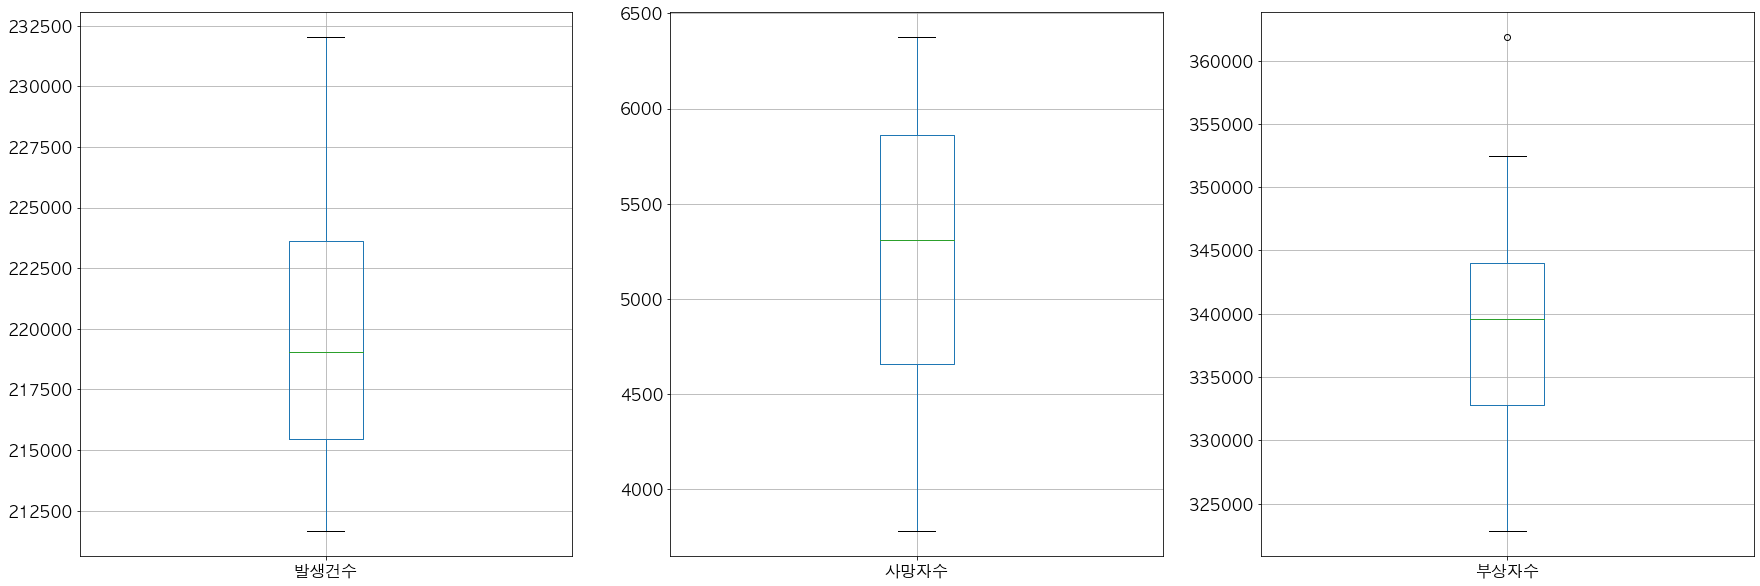

In [14]:
#그래픽 크기만 재설정
pyplot.rcParams["figure.figsize"] = (30, 10)

fig = pyplot.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

#각 영역별로 상자그림 표시
교통사고df.boxplot(['발생건수'], ax=ax1)
교통사고df.boxplot(['사망자수'], ax=ax2)
교통사고df.boxplot(['부상자수'], ax=ax3)

#그래프출력하기
pyplot.show()


In [15]:
## #04. 서브플롯에 그래프 그리기

In [ ]:
#그래픽 크기만 재설정
pyplot.rcParams["figure.figsize"] = (30,15)

#2행 2열의 영역을 생성한다.
fig = pyplot.figure()            # 영역을 나눌 수 있는 객체 생성

ax1 = fig.add_subplot(2, 2, 1)   # 2행 2열의 영역중 첫 번째 영역
ax2 = fig.add_subplot(2, 2, 2)   # 2행 2열의 영역중 두 번째 영역
ax3 = fig.add_subplot(2, 2, 3)   # 2행 2열의 영역중 세 번째 영역
ax4 = fig.add_subplot(2, 2, 4)   # 2행 2열의 영역중 네 번째 영역

#각 영역별로 그래프를 종류별로 표시
교통사고df.plot(ax=ax1)
교통사고df.plot.bar(ax=ax2)
교통사고df['발생건수'].plot.pie(ax=ax3)
교통사고df.plot.scatter(x='발생건수', y= '부상자수', ax=ax4)

#그래프 출력하기
pyplot.show()

## #05. 서브 플롯 영역에 옵션 지정하기

In [ ]:
#--------------------------------------------------------------------
# 한글폰트, 그래픽 크기 설정
#--------------------------------------------------------------------
pyplot.rcParams["font.family"] = 'AppleGothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (30,15)

#--------------------------------------------------------------------
# 2행 2열의 영역을 생성한다.
#--------------------------------------------------------------------
fig = pyplot.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 전체 제목
fig.suptitle('2005~2018년 교통사고 현황', fontsize=36, color='#000000')

# 각 그래프 간의 가로w 세로h 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.3)

#--------------------------------------------------------------------
# 첫 번째 영역 그래프 표시
#--------------------------------------------------------------------
# 선 그래프 표시
교통사고df.plot(ax=ax1, color=['#66ff00', '#ff6600', '#0000ff'])

# 배경 격자 표시
ax1.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')

#pyplot 을 직접 사용할 경구 xticks(x축좌표, 표시할_텍스트) 형식으로 지정하지만
#서브플롯은 x축의 좌표와 표시할 텍스트를나누어서 처리한다.
# -> x축의 좌표만 지정함
start =min(교통사고df.index);
end = max(교통사고df.index)
ax1.set_xticks(list(range(start, end+1)))

# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax1.set_xticklabels(교통사고df.index, fontsize =12 ,color = '#ff0000')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax1.set(xlabel='년도', ylabel='교통사고')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0, 400000])
#--------------------------------------------------------------------
# 두 번째 영역 그래프 표시
#--------------------------------------------------------------------
# 막대 그래프 표시

# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터 프레임의 각 컬럼에 대한 색상 지정
교통사고df.plot.bar(ax=ax2, rot=0, color=['#ff6633', '#000000', '#0066ff'])

# 배경 격자 표시
ax2.grid()


# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text("2005,2018년 교통사고 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# x 축의 좌표만 지정함(막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0, len(교통사고df))))
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax2.set_xticklabels(교통사고df.index, fontsize =12 ,color = '#0000ff')

# x축과 y축의 라벨을 지정( 불필요한 부분은 생략 가능)
ax2.set(xlabel='월', ylabel='교통사고')
#--------------------------------------------------------------------
# 세 번째 영역 그래프 표시
#--------------------------------------------------------------------
# 파이그래프

교통사고df['발생건수'].plot.pie(ax=ax3, labels= 교통사고df.index, 
                        autopct="%01.f%%", textprops = {'color' : "#000000",'fontsize' :12})


# 그래프 제목
ax3.title.set_text("년도별 교통사고 발생비율")

# 배경 격자 표시 --> 파이그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

#범주 표시
ax3.legend(labels=교통사고df.index, title='범주', bbox_to_anchor=(1.4, 1))

#--------------------------------------------------------------------
# 네 번째 영역 그래프 표시
#--------------------------------------------------------------------
# 산점도 그래프
교통사고df.plot.scatter(ax=ax4, x='발생건수', y='부상자수', color ='#ff6600',
                   marker='X', label='교통사고')
# 그래프 제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 배경 격자
ax4.grid()

# x축 라벨
ax4.set(xlabel= '발생건수', ylabel='부상자수')

#--------------------------------------------------------------------
# 그래프 출력하기

#--------------------------------------------------------------------
pyplot.show()